<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Appendix: Dates and Times

In [1]:
from pylab import mpl, plt
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format = 'svg'

## Python

In [2]:
import datetime as dt

In [3]:
dt.datetime.now()  

datetime.datetime(2023, 10, 15, 5, 48, 24, 684613)

In [4]:
to = dt.datetime.today()  
to

datetime.datetime(2023, 10, 15, 5, 48, 24, 689188)

In [5]:
type(to)

datetime.datetime

In [6]:
dt.datetime.today().weekday()  

6

In [7]:
d = dt.datetime(2020, 10, 31, 10, 5, 30, 500000)  
d

datetime.datetime(2020, 10, 31, 10, 5, 30, 500000)

In [8]:
str(d)  

'2020-10-31 10:05:30.500000'

In [9]:
print(d)  

2020-10-31 10:05:30.500000


In [10]:
d.year  

2020

In [11]:
d.month  

10

In [12]:
d.day  

31

In [13]:
d.hour  

10

In [14]:
o = d.toordinal()  
o

737729

In [15]:
dt.datetime.fromordinal(o)  

datetime.datetime(2020, 10, 31, 0, 0)

In [16]:
t = dt.datetime.time(d)  
t

datetime.time(10, 5, 30, 500000)

In [17]:
type(t)

datetime.time

In [18]:
dd = dt.datetime.date(d)  
dd

datetime.date(2020, 10, 31)

In [19]:
d.replace(second=0, microsecond=0)  

datetime.datetime(2020, 10, 31, 10, 5)

In [20]:
td = d - dt.datetime.now()  
td

datetime.timedelta(days=-1079, seconds=15425, microseconds=743477)

In [21]:
type(td)  

datetime.timedelta

In [22]:
td.days

-1079

In [23]:
td.seconds

15425

In [24]:
td.microseconds

743477

In [25]:
td.total_seconds()  

-93210174.256523

In [26]:
d.isoformat()  

'2020-10-31T10:05:30.500000'

In [27]:
d.strftime('%A, %d. %B %Y %I:%M%p')  

'Saturday, 31. October 2020 10:05AM'

In [28]:
dt.datetime.strptime('2017-03-31', '%Y-%m-%d')  

datetime.datetime(2017, 3, 31, 0, 0)

In [29]:
dt.datetime.strptime('30-4-16', '%d-%m-%y')  

datetime.datetime(2016, 4, 30, 0, 0)

In [30]:
ds = str(d)
ds

'2020-10-31 10:05:30.500000'

In [31]:
dt.datetime.strptime(ds, '%Y-%m-%d %H:%M:%S.%f')  

datetime.datetime(2020, 10, 31, 10, 5, 30, 500000)

In [32]:
dt.datetime.now()

datetime.datetime(2023, 10, 15, 5, 48, 24, 803876)

In [33]:
dt.datetime.utcnow()  

datetime.datetime(2023, 10, 15, 3, 48, 24, 808350)

In [34]:
dt.datetime.now() - dt.datetime.utcnow()  

datetime.timedelta(seconds=7199, microseconds=999997)

In [35]:
class UTC(dt.tzinfo):
    def utcoffset(self, d):
        return dt.timedelta(hours=0)  
    def dst(self, d):
        return dt.timedelta(hours=0)  
    def tzname(self, d):
        return 'UTC'

In [36]:
u = dt.datetime.utcnow()

In [37]:
u

datetime.datetime(2023, 10, 15, 3, 48, 24, 819109)

In [38]:
u = u.replace(tzinfo=UTC())  

In [39]:
u

datetime.datetime(2023, 10, 15, 3, 48, 24, 819109, tzinfo=<__main__.UTC object at 0x11bd8c160>)

In [40]:
class CEST(dt.tzinfo):
    def utcoffset(self, d):
        return dt.timedelta(hours=2)  
    def dst(self, d):
        return dt.timedelta(hours=1)  
    def tzname(self, d):
        return 'CEST'

In [41]:
c = u.astimezone(CEST())  
c

datetime.datetime(2023, 10, 15, 5, 48, 24, 819109, tzinfo=<__main__.CEST object at 0x11bd8e7d0>)

In [42]:
c - c.dst()  

datetime.datetime(2023, 10, 15, 4, 48, 24, 819109, tzinfo=<__main__.CEST object at 0x11bd8e7d0>)

In [43]:
import pytz

In [44]:
pytz.country_names['US']  

'United States'

In [45]:
pytz.country_timezones['BE']  

['Europe/Brussels']

In [46]:
pytz.common_timezones[-10:]  

['Pacific/Wake',
 'Pacific/Wallis',
 'US/Alaska',
 'US/Arizona',
 'US/Central',
 'US/Eastern',
 'US/Hawaii',
 'US/Mountain',
 'US/Pacific',
 'UTC']

In [47]:
u = dt.datetime.utcnow()

In [48]:
u = u.replace(tzinfo=pytz.utc)  

In [49]:
u

datetime.datetime(2023, 10, 15, 3, 48, 24, 903730, tzinfo=<UTC>)

In [50]:
u.astimezone(pytz.timezone('CET'))  

datetime.datetime(2023, 10, 15, 5, 48, 24, 903730, tzinfo=<DstTzInfo 'CET' CEST+2:00:00 DST>)

In [51]:
u.astimezone(pytz.timezone('GMT'))  

datetime.datetime(2023, 10, 15, 3, 48, 24, 903730, tzinfo=<StaticTzInfo 'GMT'>)

In [52]:
u.astimezone(pytz.timezone('US/Central'))  

datetime.datetime(2023, 10, 14, 22, 48, 24, 903730, tzinfo=<DstTzInfo 'US/Central' CDT-1 day, 19:00:00 DST>)

## NumPy

In [53]:
import numpy as np

In [54]:
nd = np.datetime64('2020-10-31') 
nd

numpy.datetime64('2020-10-31')

In [55]:
np.datetime_as_string(nd)  

'2020-10-31'

In [56]:
np.datetime_data(nd)  

('D', 1)

In [57]:
d

datetime.datetime(2020, 10, 31, 10, 5, 30, 500000)

In [58]:
nd = np.datetime64(d)  
nd

numpy.datetime64('2020-10-31T10:05:30.500000')

In [59]:
nd.astype(dt.datetime)  

datetime.datetime(2020, 10, 31, 10, 5, 30, 500000)

In [60]:
nd = np.datetime64('2020-10', 'D')
nd

numpy.datetime64('2020-10-01')

In [61]:
np.datetime64('2020-10') == np.datetime64('2020-10-01')

True

In [62]:
np.array(['2020-06-10', '2020-07-10', '2020-08-10'], dtype='datetime64')

array(['2020-06-10', '2020-07-10', '2020-08-10'], dtype='datetime64[D]')

In [63]:
np.array(['2020-06-10T12:00:00', '2020-07-10T12:00:00',
          '2020-08-10T12:00:00'], dtype='datetime64[s]')

array(['2020-06-10T12:00:00', '2020-07-10T12:00:00',
       '2020-08-10T12:00:00'], dtype='datetime64[s]')

In [64]:
np.arange('2020-01-01', '2020-01-04', dtype='datetime64')  

array(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[D]')

In [65]:
np.arange('2020-01-01', '2020-10-01', dtype='datetime64[M]')  

array(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09'], dtype='datetime64[M]')

In [66]:
np.arange('2020-01-01', '2020-10-01', dtype='datetime64[W]')[:10]  

array(['2019-12-26', '2020-01-02', '2020-01-09', '2020-01-16',
       '2020-01-23', '2020-01-30', '2020-02-06', '2020-02-13',
       '2020-02-20', '2020-02-27'], dtype='datetime64[W]')

In [67]:
dtl = np.arange('2020-01-01T00:00:00', '2020-01-02T00:00:00',
                dtype='datetime64[h]')  
dtl[:10]

array(['2020-01-01T00', '2020-01-01T01', '2020-01-01T02', '2020-01-01T03',
       '2020-01-01T04', '2020-01-01T05', '2020-01-01T06', '2020-01-01T07',
       '2020-01-01T08', '2020-01-01T09'], dtype='datetime64[h]')

In [68]:
np.arange('2020-01-01T00:00:00', '2020-01-02T00:00:00',
          dtype='datetime64[s]')[:10]  

array(['2020-01-01T00:00:00', '2020-01-01T00:00:01',
       '2020-01-01T00:00:02', '2020-01-01T00:00:03',
       '2020-01-01T00:00:04', '2020-01-01T00:00:05',
       '2020-01-01T00:00:06', '2020-01-01T00:00:07',
       '2020-01-01T00:00:08', '2020-01-01T00:00:09'],
      dtype='datetime64[s]')

In [69]:
np.arange('2020-01-01T00:00:00', '2020-01-02T00:00:00',
          dtype='datetime64[ms]')[:10]  

array(['2020-01-01T00:00:00.000', '2020-01-01T00:00:00.001',
       '2020-01-01T00:00:00.002', '2020-01-01T00:00:00.003',
       '2020-01-01T00:00:00.004', '2020-01-01T00:00:00.005',
       '2020-01-01T00:00:00.006', '2020-01-01T00:00:00.007',
       '2020-01-01T00:00:00.008', '2020-01-01T00:00:00.009'],
      dtype='datetime64[ms]')

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
np.random.seed(3000)
rnd = np.random.standard_normal(len(dtl)).cumsum() ** 2

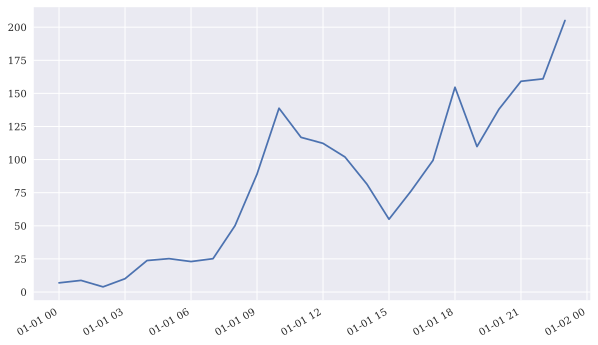

In [72]:
fig = plt.figure(figsize=(10, 6))
plt.plot(dtl.astype(dt.datetime), rnd)  
fig.autofmt_xdate();  
# plt.savefig('../../images/a_dates/dt_01.png');

## pandas

In [73]:
import pandas as pd

In [74]:
ts = pd.Timestamp('2020-06-30')  
ts

Timestamp('2020-06-30 00:00:00')

In [75]:
d = ts.to_pydatetime()  
d

datetime.datetime(2020, 6, 30, 0, 0)

In [76]:
pd.Timestamp(d)  

Timestamp('2020-06-30 00:00:00')

In [77]:
pd.Timestamp(nd)  

Timestamp('2020-10-01 00:00:00')

In [78]:
dti = pd.date_range('2020/01/01', freq='M', periods=12)  
dti

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

In [79]:
dti[6]

Timestamp('2020-07-31 00:00:00')

In [80]:
pdi = dti.to_pydatetime()  
pdi

array([datetime.datetime(2020, 1, 31, 0, 0),
       datetime.datetime(2020, 2, 29, 0, 0),
       datetime.datetime(2020, 3, 31, 0, 0),
       datetime.datetime(2020, 4, 30, 0, 0),
       datetime.datetime(2020, 5, 31, 0, 0),
       datetime.datetime(2020, 6, 30, 0, 0),
       datetime.datetime(2020, 7, 31, 0, 0),
       datetime.datetime(2020, 8, 31, 0, 0),
       datetime.datetime(2020, 9, 30, 0, 0),
       datetime.datetime(2020, 10, 31, 0, 0),
       datetime.datetime(2020, 11, 30, 0, 0),
       datetime.datetime(2020, 12, 31, 0, 0)], dtype=object)

In [81]:
pd.DatetimeIndex(pdi)  

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq=None)

In [82]:
pd.DatetimeIndex(dtl)  

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               '2020-01-01 10:00:00', '2020-01-01 11:00:00',
               '2020-01-01 12:00:00', '2020-01-01 13:00:00',
               '2020-01-01 14:00:00', '2020-01-01 15:00:00',
               '2020-01-01 16:00:00', '2020-01-01 17:00:00',
               '2020-01-01 18:00:00', '2020-01-01 19:00:00',
               '2020-01-01 20:00:00', '2020-01-01 21:00:00',
               '2020-01-01 22:00:00', '2020-01-01 23:00:00'],
              dtype='datetime64[s]', freq=None)

In [83]:
rnd = np.random.standard_normal(len(dti)).cumsum() ** 2

In [84]:
df = pd.DataFrame(rnd, columns=['data'], index=dti)

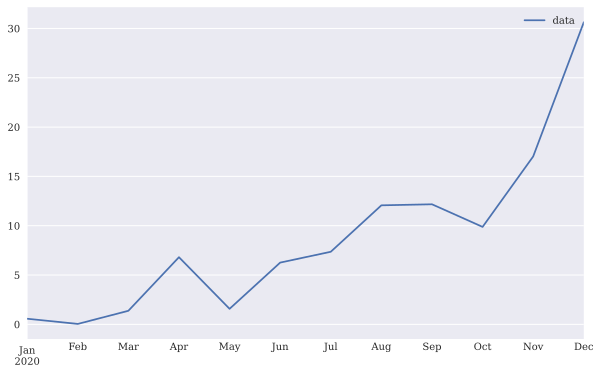

In [85]:
df.plot(figsize=(10, 6));
# plt.savefig('../../images/a_dates/dt_02.png');

In [86]:
pd.date_range('2020/01/01', freq='M', periods=12, tz=pytz.timezone('CET'))

DatetimeIndex(['2020-01-31 00:00:00+01:00', '2020-02-29 00:00:00+01:00',
               '2020-03-31 00:00:00+02:00', '2020-04-30 00:00:00+02:00',
               '2020-05-31 00:00:00+02:00', '2020-06-30 00:00:00+02:00',
               '2020-07-31 00:00:00+02:00', '2020-08-31 00:00:00+02:00',
               '2020-09-30 00:00:00+02:00', '2020-10-31 00:00:00+01:00',
               '2020-11-30 00:00:00+01:00', '2020-12-31 00:00:00+01:00'],
              dtype='datetime64[ns, CET]', freq='M')

In [87]:
dti = pd.date_range('2020/01/01', freq='M', periods=12, tz='US/Eastern')
dti

DatetimeIndex(['2020-01-31 00:00:00-05:00', '2020-02-29 00:00:00-05:00',
               '2020-03-31 00:00:00-04:00', '2020-04-30 00:00:00-04:00',
               '2020-05-31 00:00:00-04:00', '2020-06-30 00:00:00-04:00',
               '2020-07-31 00:00:00-04:00', '2020-08-31 00:00:00-04:00',
               '2020-09-30 00:00:00-04:00', '2020-10-31 00:00:00-04:00',
               '2020-11-30 00:00:00-05:00', '2020-12-31 00:00:00-05:00'],
              dtype='datetime64[ns, US/Eastern]', freq='M')

In [88]:
dti.tz_convert('GMT')

DatetimeIndex(['2020-01-31 05:00:00+00:00', '2020-02-29 05:00:00+00:00',
               '2020-03-31 04:00:00+00:00', '2020-04-30 04:00:00+00:00',
               '2020-05-31 04:00:00+00:00', '2020-06-30 04:00:00+00:00',
               '2020-07-31 04:00:00+00:00', '2020-08-31 04:00:00+00:00',
               '2020-09-30 04:00:00+00:00', '2020-10-31 04:00:00+00:00',
               '2020-11-30 05:00:00+00:00', '2020-12-31 05:00:00+00:00'],
              dtype='datetime64[ns, GMT]', freq='M')

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>